In [11]:
import torch
import numpy as np 
import pandas as pd 
from torch import nn
import matplotlib.pyplot as plt


In [14]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [15]:
len(X), len(y)

(50, 50)

In [22]:
#train split 
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test) 

(40, 10)

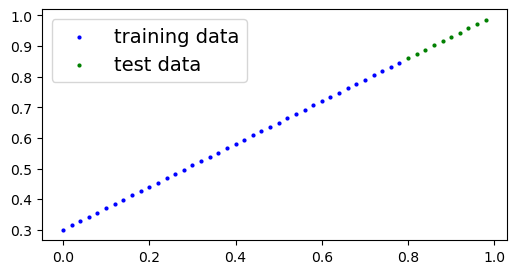

In [41]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions =None):
    plt.figure(figsize=(6,3))
    plt.scatter(train_data,train_labels,c='b', s=4, label="training data")
    plt.scatter(test_data,test_label,c='g', s=4, label="test data")
    if predictions is not None:
            plt.scatter(test_data,predictions,c='r', s=4, label="predictions")

    plt.legend(prop={"size" :14})
    
    
plot_predictions()

In [83]:
#Creating a linear regression class
class LinearRegressionmodel(nn.Module): #almost everything in pytorch inherits from nn.Module
    def __init__(self):
       super().__init__()
       self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad= True,
                                               dtype= torch.float))
       self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad= True,
                                            dtype= torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

In [84]:
#create a random seed 
torch.manual_seed(42)

model_0 = LinearRegressionmodel()
#list our model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [85]:
#list the named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [88]:
#make a prediction
with torch.inference_mode(): #this will turn of the gradient tracking.
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

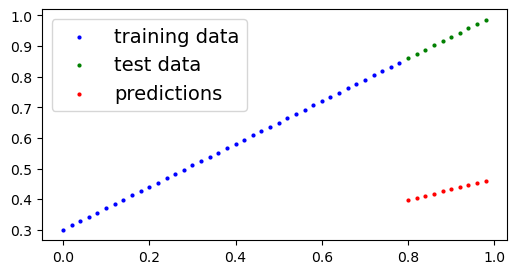

In [87]:
plot_predictions(predictions=y_preds)

In [97]:
#setup a loss function
loss_fn = nn.L1Loss()

#setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [101]:
#looping through the data

epochs = 1000
for epoch in range(epochs):
    model_0.train() #sets all parameters that require gradient to require gradient
    
    #1. forward pass
    y_pred = model_0(X_train)
    
    #2. calculate the loss function
    loss = loss_fn(y_pred, y_train) #input first target next
    
    #3. optimizer zero grad
    optimizer.zero_grad()
    
    #4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    #5. Step the optimizer. Perform gradient descent
    optimizer.step()
    
    model_0.eval() #turns off gradient tracking
    